In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"E:\kaggle\titanicv2\data\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
# 1
import re
df['Title'] = df['Name'].map(lambda x: re.compile(",(.*?)\.").findall(x)[0])
df['Title'] = df['Title'].map(str.strip) # 匹配的逗号后面有空格，记得去除空格，不然下一步没法替换
df.Title.head()

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Title, dtype: object

In [45]:
df['Title'][df.Title=='Jonkheer'] = 'Master'
df['Title'][df.Title.isin(['Ms','Mlle'])] = 'Miss'
df['Title'][df.Title.isin(['Mme','Dona', 'Lady', 'the Countess'])] = 'Mrs'
df['Title'][df.Title.isin(['Capt', 'Don', 'Major', 'Col', 'Sir'])] = 'Mr'
df['Title'][df.Title.isin(['Dr','Rev'])] = 'DrAndRev'
df.head()

D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\Program Files\Anaconda2\lib\site-packages\ipyke

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [46]:
df['Title'] = pd.factorize(df.Title)[0]
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [47]:
# 3
df['Sex'] = pd.factorize(df.Sex)[0]
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,1


In [48]:
# 4
df['Familysize'] = df['SibSp'] + df["Parch"]
df['Familysize'][df.Familysize==0] = 0
df['Familysize'][df.Familysize>0] = 1 # 分两类吧，带了亲戚，没带亲戚
df.head()

D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,1,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,1,1


In [ ]:
#用pylab画散点图：
import pylab as pl
%pylab inline
pl.scatter(df.index,df['Age'])

In [49]:
# 5
df['Fare'][df.Fare<20] = 0
df['Fare'][df.Fare>=20] = 1
df.head()

D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,0.0,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,0.0,NaN,S,1,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,0.0,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,0.0,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,0.0,NaN,S,1,1


In [38]:
# 6
df_tag = df.Survived
df_tag.to_csv(r'E:\kaggle\titanicv2\cleaned_data\train_tag.csv',  index=None)

In [50]:
df.drop(['PassengerId', 'Name', 'SibSp' ,'Parch','Ticket', 'Cabin','Embarked'],inplace=True, axis=1)
df.head()

,Pclass,Sex,Age,Fare,Title,Familysize
0,3,0,34.5,0.0,0,0
1,3,1,47.0,0.0,1,1
2,2,0,62.0,0.0,0,0
3,3,0,27.0,0.0,0,0
4,3,1,22.0,0.0,1,1


In [51]:
# 7 
df['Age'][(df.Age<18)&(df.Age.notnull())] = 0
df['Age'][(df.Age>=18)&(df.Age.notnull())] = 1
df.head()

D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Pclass,Sex,Age,Fare,Title,Familysize
0,3,0,1.0,0.0,0,0
1,3,1,1.0,0.0,1,1
2,2,0,1.0,0.0,0,0
3,3,0,1.0,0.0,0,0
4,3,1,1.0,0.0,1,1


In [55]:
df.info()# 注意test的fare有个空值，我手改了
df['Fare'][df.Fare.isnull()] = 10

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass        418 non-null int64
Sex           418 non-null int32
Age           332 non-null float64
Fare          417 non-null float64
Title         418 non-null int32
Familysize    418 non-null int64
dtypes: float64(2), int32(2), int64(2)
memory usage: 16.4 KB


D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [56]:
y_train = df['Age'][df.Age.notnull()].values
x_train = df[df.Age.notnull()].drop(['Age'],axis=1).values
x_test = df[df.Age.isnull()].drop(['Age'],axis=1).values
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(x_train,y_train)
df['Age'][df.Age.isnull()] = rfc.predict(x_test)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass        418 non-null int64
Sex           418 non-null int32
Age           418 non-null float64
Fare          418 non-null float64
Title         418 non-null int32
Familysize    418 non-null int64
dtypes: float64(2), int32(2), int64(2)
memory usage: 16.4 KB


D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [57]:
# 8
#df.drop(['Survived'],axis=1,inplace=True)
df.to_csv(r'E:\kaggle\titanicv2\cleaned_data\cleaned_test_feature.csv', header=None, index=None)
df.head()

,Pclass,Sex,Age,Fare,Title,Familysize
0,3,0,1.0,0.0,0,0
1,3,1,1.0,0.0,1,1
2,2,0,1.0,0.0,0,0
3,3,0,1.0,0.0,0,0
4,3,1,1.0,0.0,1,1


Populating the interactive namespace from numpy and matplotlib


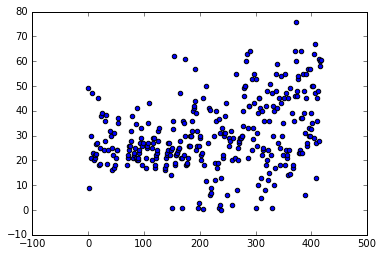

In [23]:
#用pylab画散点图：
import pylab as pl
%pylab inline
pl.scatter(df.index,df['Age'])